<a href="https://colab.research.google.com/github/fedemoss/Clustering-of-Spotify-Songs/blob/main/spotify_RockArgentino_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

En este script uso un Dataset de features+Lyrics de canciones de Rock Argentino. Este dataset fue creado por mi a partir del notebook: 'spotify_API_and_Lyrics.ipynb'. La idea de este proyecto es separar a las canciones en decadas: 60s, 70s, 80s, 90s, 2000s, 2010s... y hacer analisis con las letras de estas canciones. El proyecto apunta a 3 cosas:



1.   Ver que artistas eran los mas relevantes en cada decada.
2.   Ver que palabras eran las mas usadas en cada decada. 
3.   Hacer un analisis de sentimientos en cada decadas. 


NOTA: El dataset usado esta MUY desbalanceado. Esto es porque el codigo encargado de sacar letras de musica.com no funciona como deberia: Lyrics not found es algo muy recurrente para canciones viejas. Estaria bueno hacer scrapping de letras de otra pagina... no me gusta para nada musica.com. PERO es lo que hay (hasta que tenga ganas de hace scrapping de otra pagina de letras). Asi que *recomendacion*: tomar con pinzas todo lo que aparezca en las decadas de los 60s, 70s y 80s. 

---
---




In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Loading Dataset and creating new features

Cargamos el Dataframe de canciones con features + letras que cree en el script 'spotify_API_and_Lyrics.ipynb'. En particular, corri este codigo SOLO con playlists de Rock Argentino. 

In [ ]:
#Cargamos los datos
filename_rock = '/content/drive/My Drive/LaboDatos/df_rock_merged.csv'
df = pd.read_csv(filename_rock) # Levantamos los datos
df = df.set_index('id')

In [ ]:
#Definimos un par de cosas

songs = df['Song']
artists = df['Artist']

#Dropeamos algunas cosas mas como: type, unnamed, song,...
df = df.drop(['type','mode','Song','key'], axis=1).copy()


#Datetime
df['year'] = pd.DatetimeIndex(df['Date']).year
df= df.drop(['Date'], axis=1).copy()

df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Disc number,Total tracks,Track number,Popularity,TOP,Artist,Lyrics,year
id,,,,,,,,,,,,,,,,,,,
75dqA2rQHnUtP7XjvkmKh2,0.545,0.978,-4.937,0.0364,0.0167,0.000015,0.0787,0.871,133.016,214600.0,4.0,1,15,2,57,0,Viejas Locas,"[Todo sigue igual, todo sigue igual de bien, s...",1999
4tHukPtCIjMugUkLh0aIpE,0.497,0.984,-4.561,0.0815,0.0938,0.000000,0.9280,0.496,124.845,340653.0,4.0,1,14,14,40,0,Fito Paez,"[Se me hací­a tarde, ya me iba Siempre se har...",2012
5blxpfx1eNYeA9y7jDUTT6,0.626,0.629,-7.451,0.0778,0.2710,0.000001,0.5250,0.797,79.217,110507.0,4.0,1,20,5,40,0,Los Pericos,"[Cuídame bien, lo mío es serio, quiero que est...",2000
55XrKecG9mBBLI3PL3KzXU,0.649,0.929,-5.614,0.0788,0.0524,0.000000,0.0868,0.729,106.774,267733.0,4.0,1,14,1,49,0,Andrés Calamaro,"[El campeon tiene miedo, tiene miedo de pegar,...",1997
3AjSUbPd7siXGOSlmXm9Nr,0.662,0.834,-6.424,0.0265,0.0122,0.000038,0.2010,0.772,116.037,263653.0,4.0,1,15,5,57,0,Viejas Locas,"[Cuando sale del trabajo, Homero viene pensand...",1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2VWQAtJhyN3sQPJidCbP8v,0.762,0.922,-5.665,0.0467,0.4000,0.100000,0.1100,0.480,124.370,292320.0,4.0,1,30,4,49,0,Soda Stereo,[Comunicación sin emoción Una voz en off con e...,2006
5JVOw3uyvIjyldy57dS592,0.526,0.611,-9.660,0.0342,0.0583,0.000000,0.3950,0.358,112.298,273307.0,4.0,1,14,8,50,0,Fito Paez,[Tu amor abrió una herida Porque todo lo que ...,1992
3VCKdfJAL8DTDlwZw5O6Ik,0.415,0.621,-6.519,0.0337,0.7410,0.001110,0.1340,0.386,83.430,208093.0,4.0,1,9,7,52,0,Charly García,"[Los amigos del barrio pueden desaparecer, los...",1983


In [ ]:
#Organicemos por decadas
six = np.zeros(len(df))
sev = np.zeros(len(df))
eight = np.zeros(len(df))
nine = np.zeros(len(df))
twothou = np.zeros(len(df))
twoten = np.zeros(len(df))
i=0
for j in range(len(df)):
  if df['year'][j] < 1970:
      six[i] = 1
      sev[i] = 0
      eight[i] = 0
      nine[i] = 0
      twothou[i] = 0
      twoten[i] = 0
      i=i+1

  if df['year'][j] >= 1970 and df['year'][i] <= 1979:
      six[i] = 0
      sev[i] = 1
      eight[i] = 0
      nine[i] = 0
      twothou[i] = 0
      twoten[i] = 0
      i=i+1

  if df['year'][j] >= 1980 and df['year'][i] <= 1989:
      six[i] = 0
      sev[i] = 0
      eight[i] = 1
      nine[i] = 0
      twothou[i] = 0
      twoten[i] = 0
      i=i+1

  if df['year'][j] >= 1990 and df['year'][i] <= 1999:
      six[i] = 0
      sev[i] = 0
      eight[i] = 0
      nine[i] = 1
      twothou[i] = 0
      twoten[i] = 0
      i=i+1

  if df['year'][j] >= 2000 and df['year'][i] <= 2009:
      six[i] = 0
      sev[i] = 0
      eight[i] = 0
      nine[i] = 0
      twothou[i] = 1
      twoten[i] = 0
      i=i+1

  if df['year'][j] >= 2010 and df['year'][i] <= 2021:
      six[i] = 0
      sev[i] = 0
      eight[i] = 0
      nine[i] = 0
      twothou[i] = 0
      twoten[i] = 1
      i=i+1

df['60s'] = six
df['70s'] = sev
df['80s'] = eight
df['90s'] = nine
df['2000s'] = twothou
df['2010s'] = twoten
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Disc number,Total tracks,Track number,Popularity,TOP,Artist,Lyrics,year,60s,70s,80s,90s,2000s,2010s
id,,,,,,,,,,,,,,,,,,,,,,,,,
75dqA2rQHnUtP7XjvkmKh2,0.545,0.978,-4.937,0.0364,0.0167,0.000015,0.0787,0.871,133.016,214600.0,4.0,1,15,2,57,0,Viejas Locas,"[Todo sigue igual, todo sigue igual de bien, s...",1999,0.0,0.0,0.0,1.0,0.0,0.0
4tHukPtCIjMugUkLh0aIpE,0.497,0.984,-4.561,0.0815,0.0938,0.000000,0.9280,0.496,124.845,340653.0,4.0,1,14,14,40,0,Fito Paez,"[Se me hací­a tarde, ya me iba Siempre se har...",2012,0.0,0.0,0.0,0.0,0.0,1.0
5blxpfx1eNYeA9y7jDUTT6,0.626,0.629,-7.451,0.0778,0.2710,0.000001,0.5250,0.797,79.217,110507.0,4.0,1,20,5,40,0,Los Pericos,"[Cuídame bien, lo mío es serio, quiero que est...",2000,0.0,0.0,0.0,0.0,1.0,0.0
55XrKecG9mBBLI3PL3KzXU,0.649,0.929,-5.614,0.0788,0.0524,0.000000,0.0868,0.729,106.774,267733.0,4.0,1,14,1,49,0,Andrés Calamaro,"[El campeon tiene miedo, tiene miedo de pegar,...",1997,0.0,0.0,0.0,1.0,0.0,0.0
3AjSUbPd7siXGOSlmXm9Nr,0.662,0.834,-6.424,0.0265,0.0122,0.000038,0.2010,0.772,116.037,263653.0,4.0,1,15,5,57,0,Viejas Locas,"[Cuando sale del trabajo, Homero viene pensand...",1999,0.0,0.0,0.0,1.0,0.0,0.0


Separemos por decadas

In [ ]:
#df decades
indice_six = np.logical_not(df['60s'] == 1) #los indices que son 0
indice_sev = np.logical_not(df['70s'] == 1) 
indice_eight = np.logical_not(df['80s'] == 1) 
indice_nine = np.logical_not(df['90s'] == 1)
indice_twotho = np.logical_not(df['2000s'] == 1)
indice_twoten = np.logical_not(df['2010s'] == 1)

df_six = df.drop(df[indice_six].index) #dropeo los indices 0 y me quedo con los 1
df_sev = df.drop(df[indice_sev].index)
df_eight = df.drop(df[indice_eight].index)
df_nine = df.drop(df[indice_nine].index)
df_twotho = df.drop(df[indice_twotho].index)
df_twoten = df.drop(df[indice_twoten].index)

print('Size 60s:',np.size(df_six['60s']))
print('Size 70s:',np.size(df_sev['70s']))
print('Size 80s:',np.size(df_eight['80s']))
print('Size 90s:',np.size(df_nine['90s']))
print('Size 2000s:',np.size(df_twotho['2000s']))
print('Size 2010s:',np.size(df_twoten['2010s']))

Size 60s: 1
Size 70s: 4
Size 80s: 8
Size 90s: 29
Size 2000s: 76
Size 2010s: 37


Super desbalaceado pero por ahora es lo que hay!!

# WordClouds: Artists per Decades

In [ ]:
#df artists
df_artists_eight = df_eight['Artist']
df_artists_nine = df_nine['Artist']
df_artists_two = df_twotho['Artist']
df_artists_twoten = df_twoten['Artist']

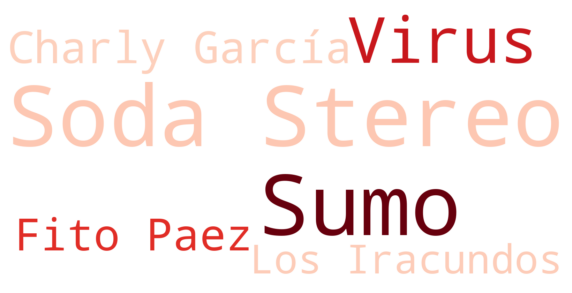

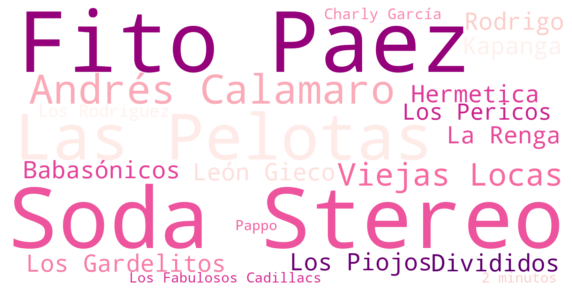

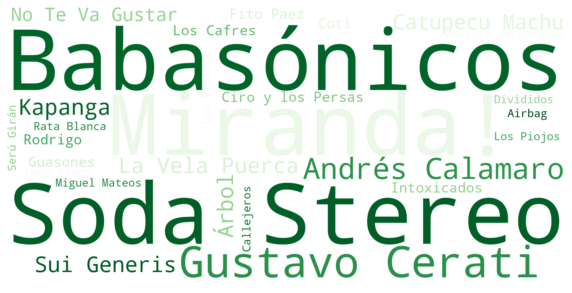

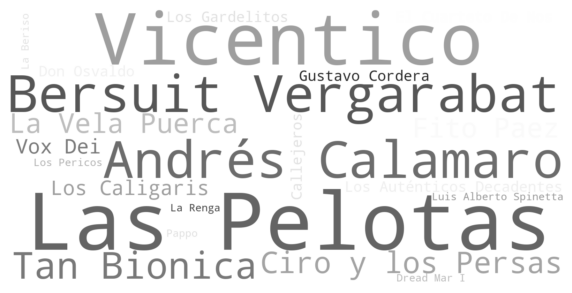

In [ ]:
#WordCloud artists
from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt 

d = df_artists_eight
wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'Reds' # La gama de colores para coloreal
               ).generate_from_frequencies(d.value_counts().to_dict())
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.show()
d = df_artists_nine
wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'RdPu' # La gama de colores para coloreal
               ).generate_from_frequencies(d.value_counts().to_dict())
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.show()
d = df_artists_two
wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'Greens' # La gama de colores para coloreal
               ).generate_from_frequencies(d.value_counts().to_dict())
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.show()
d = df_artists_twoten
wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'Greys' # La gama de colores para coloreal
               ).generate_from_frequencies(d.value_counts().to_dict())
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.show()

# Lyrics filtering and WordClouds

VAMOS A POR LAS LYRICS!

In [ ]:
import re       # libreria de expresiones regulares
import string   # libreria de cadena de caracteres

In [ ]:
# Defino una funcion que recibe un texto y devuelve el mismo texto sin singnos,
def clean_text_round1(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()                                              
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)                           
    # reemplaza singnos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) 
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text)                              
    return text

# Defino una funcion anonima que al pasarle un argumento devuelve el resultado de aplicarle la funcion anterior a este mismo argumento
round1 = lambda x: clean_text_round1(x)

# Dataframe que resulta de aplicarle a las columnas la funcion de limpieza
data_clean_six = pd.DataFrame(df_six['Lyrics'].apply(round1))
data_clean_sev = pd.DataFrame(df_sev['Lyrics'].apply(round1))
data_clean_eight = pd.DataFrame(df_eight['Lyrics'].apply(round1))
data_clean_nine = pd.DataFrame(df_nine['Lyrics'].apply(round1))
data_clean_two = pd.DataFrame(df_twotho['Lyrics'].apply(round1))
data_clean_twoten = pd.DataFrame(df_twoten['Lyrics'].apply(round1))

Clean Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize


lines_spa = nltk.corpus.stopwords.words('spanish')

list_text_six = list(data_clean_six['Lyrics'])
list_text_sev = list(data_clean_sev['Lyrics'])
list_text_eight = list(data_clean_eight['Lyrics'])
list_text_nine = list(data_clean_nine['Lyrics'])
list_text_two= list(data_clean_two['Lyrics'])
list_text_twoten= list(data_clean_twoten['Lyrics'])

text_six = (" ").join(list_text_six)
text_sev = (" ").join(list_text_sev)
text_eight = (" ").join(list_text_eight)
text_nine = (" ").join(list_text_nine)
text_two = (" ").join(list_text_two)
text_twoten = (" ").join(list_text_twoten)


text_tokens_six = word_tokenize(text_six) 
text_tokens_sev = word_tokenize(text_sev) 
text_tokens_eight = word_tokenize(text_eight) 
text_tokens_nine = word_tokenize(text_nine) 
text_tokens_two = word_tokenize(text_two) 
text_tokens_twoten = word_tokenize(text_twoten) 

all_stopwords = lines_spa
all_stopwords.extend(['’','ah','ahh','yeah','oh','ohh','ey','hey','uh','uhh']) #saco algunas stopwords mas

tokens_without_sw_six = [word for word in text_tokens_six if not word in all_stopwords] #remuevo stopwords
tokens_without_sw_sev = [word for word in text_tokens_sev if not word in all_stopwords] 
tokens_without_sw_eight = [word for word in text_tokens_eight if not word in all_stopwords]
tokens_without_sw_nine = [word for word in text_tokens_nine if not word in all_stopwords] 
tokens_without_sw_two = [word for word in text_tokens_two if not word in all_stopwords]
tokens_without_sw_twoten = [word for word in text_tokens_twoten if not word in all_stopwords]   

filtered_sentence_six = (" ").join(tokens_without_sw_six) #Uno todo de nuevo
filtered_sentence_sev = (" ").join(tokens_without_sw_sev)
filtered_sentence_eight = (" ").join(tokens_without_sw_eight)
filtered_sentence_nine = (" ").join(tokens_without_sw_nine)
filtered_sentence_two = (" ").join(tokens_without_sw_two)
filtered_sentence_twoten = (" ").join(tokens_without_sw_twoten)

print(filtered_sentence_six)
print(tokens_without_sw_six)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
buen tipo viejo anda solo esperando tristeza larga venir andando miro lejos tan distintos creció siglo tranvía vino tinto viejo querido viejo ahora camina lerdo perdonando viento sangre viejo silencio tiempo ojos buenos figura pesada edad vino encima carnaval comparsa años nuevos hombre años viejos dolor lleva adentro historia tiempo viejo querido viejo ahora camina lerdo perdonando viento sangre viejo silencio tiempo
['buen', 'tipo', 'viejo', 'anda', 'solo', 'esperando', 'tristeza', 'larga', 'venir', 'andando', 'miro', 'lejos', 'tan', 'distintos', 'creció', 'siglo', 'tranvía', 'vino', 'tinto', 'viejo', 'querido', 'viejo', 'ahora', 'camina', 'lerdo', 'perdonando', 'viento', 'sangre', 'viejo', 'silencio', 'tiempo', 'ojos', 'buenos', 'figura', 'pesada', 'edad', 'vino', 'enci

In [ ]:
#Count words
print('60s:',pd.DataFrame(tokens_without_sw_six).value_counts())
print('70s:',pd.DataFrame(tokens_without_sw_sev).value_counts())
print('80s:',pd.DataFrame(tokens_without_sw_eight).value_counts())
print('90s:',pd.DataFrame(tokens_without_sw_nine).value_counts())
print('2000s:',pd.DataFrame(tokens_without_sw_two).value_counts())
print('2010s:',pd.DataFrame(tokens_without_sw_twoten).value_counts())

#Sacamos lo que vemos que hay que sacar
filtered_sentence_six = filtered_sentence_six.replace('’','').replace('yeah','').replace(' usa','').replace('aquí','').replace('oh','').replace('ah','').replace('ahh','').replace('hey','').replace(' ey','').replace('eh','').replace('uh','').replace('ora','').replace(' na','').replace(' si','').replace(' sí','').replace(' va','').replace('vos ','').replace('voy','')
filtered_sentence_sev = filtered_sentence_sev.replace('’','').replace('yeah','').replace(' usa','').replace('aquí','').replace('oh','').replace('ah','').replace('ahh','').replace('hey','').replace(' ey','').replace('eh','').replace('uh','').replace('ora','').replace(' na','').replace(' si','').replace(' sí','').replace(' va','').replace('vos ','').replace('voy','')
filtered_sentence_eight = filtered_sentence_eight.replace('’','').replace('yeah','').replace(' usa','').replace('aquí','').replace('oh','').replace('ah','').replace('ahh','').replace('hey','').replace(' ey','').replace('eh','').replace('uh','').replace('ora','').replace(' na','').replace(' si','').replace(' sí','').replace(' va','').replace('vos ','').replace('voy','').replace('telarañas','')
filtered_sentence_nine = filtered_sentence_nine.replace('’','').replace('yeah','').replace(' usa','').replace('aquí','').replace('oh','').replace('ah','').replace('ahh','').replace('hey','').replace(' ey','').replace('eh','').replace('uh','').replace('ora','').replace(' na','').replace(' si','').replace(' sí','').replace(' va','').replace('vos ','').replace('voy','')
filtered_sentence_two = filtered_sentence_two.replace('’','').replace('yeah','').replace(' usa','').replace('aquí','').replace('oh','').replace('ah','').replace('ahh','').replace('hey','').replace(' ey','').replace('eh','').replace('uh','').replace('ora','').replace(' na','').replace(' si','').replace(' sí','').replace(' va','').replace('vos ','').replace('voy','')
filtered_sentence_twoten = filtered_sentence_twoten.replace('’','').replace('yeah','').replace('usa','').replace('aquí','').replace('oh','').replace('ah','').replace('ahh','').replace('hey','').replace(' ey','').replace('eh','').replace('uh','').replace('ora','').replace(' na','').replace(' si','').replace(' sí','').replace(' va','').replace('vos ','').replace('voy','')

60s: viejo         7
tiempo        3
vino          2
silencio      2
ahora         2
años          2
camina        2
viento        2
perdonando    2
querido       2
sangre        2
lerdo         2
solo          1
siglo         1
viejos        1
anda          1
andando       1
venir         1
buen          1
buenos        1
tristeza      1
carnaval      1
comparsa      1
creció        1
distintos     1
dolor         1
edad          1
encima        1
esperando     1
figura        1
historia      1
hombre        1
larga         1
lejos         1
tranvía       1
lleva         1
miro          1
nuevos        1
ojos          1
tipo          1
pesada        1
tinto         1
tan           1
adentro       1
dtype: int64
70s: hombres         10
hierro          10
escuchan         9
pensamientos     8
voz              7
                ..
mal              1
sensual          1
marcó            1
sangre           1
abandono         1
Length: 166, dtype: int64
80s: disco            19
you          

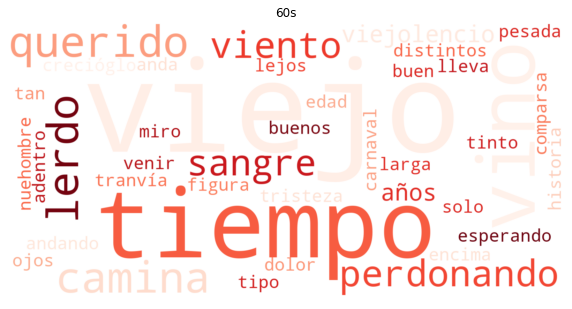

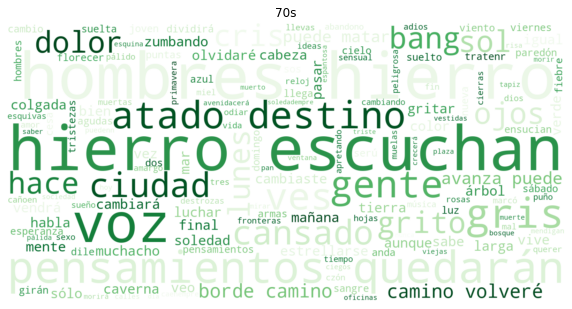

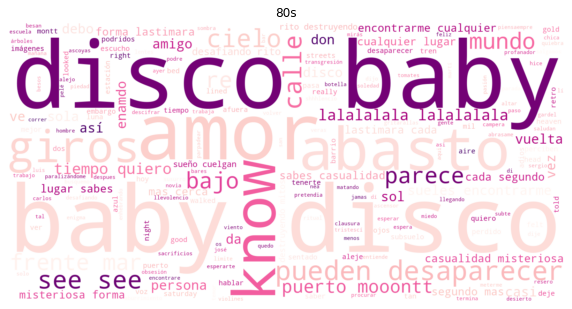

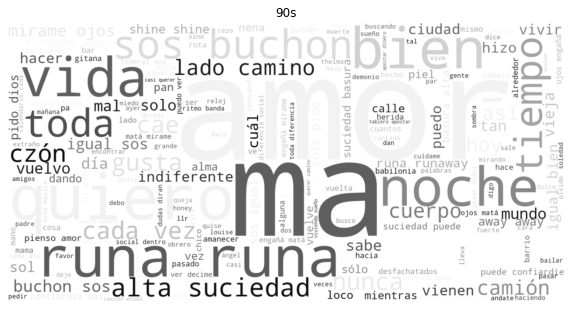

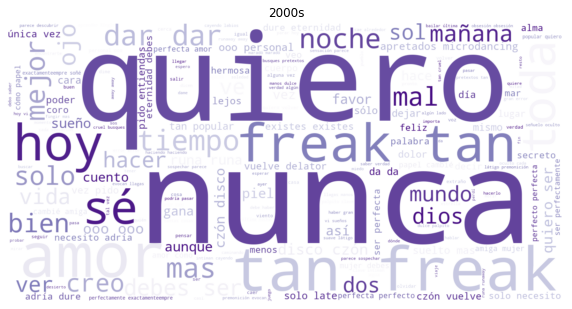

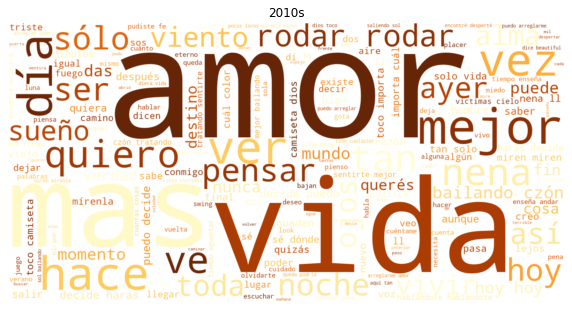

In [ ]:
from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords

plt.rcParams['figure.figsize'] = [16,12] # tamanio de los plots

#WC
wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'Reds' # La gama de colores para coloreal
               ).generate_from_text(filtered_sentence_six)
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.title('60s')
plt.show()

wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'Greens' # La gama de colores para coloreal
               ).generate_from_text(filtered_sentence_sev)
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.title('70s')
plt.show()

wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'RdPu' # La gama de colores para coloreal
               ).generate_from_text(filtered_sentence_eight)
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.title('80s')
plt.show()

wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'Greys' # La gama de colores para coloreal
               ).generate_from_text(filtered_sentence_nine)
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.title('90s')
plt.show()

wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'Purples' # La gama de colores para coloreal
               ).generate_from_text(filtered_sentence_two)
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.title('2000s')
plt.show()

wc = WordCloud(width = 1600, # Estos dos campos son importantes para definir la calidad de la imagen final
               height = 800,
               background_color = 'white', # El color de fondo que buscamos
               colormap = 'YlOrBr' # La gama de colores para coloreal
               ).generate_from_text(filtered_sentence_twoten)
fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wc, interpolation = 'bilinear')
ax.axis("off")
plt.title('2010s')
plt.show()

# Sentiment analysis

In [ ]:
!pip install sentileak
!pip install sentiment_analysis_spanish

import pandas as pd # Data frames
from gensim.utils import tokenize # Tokenizacion, saca simbolos y números (para otras funcionalidades, hacerlo a mano o buscar en nltk)
from gensim.matutils import corpus2csc # Llevar las listas de palabras a una descripción frecuentista
from gensim.corpora import Dictionary # Armado de base de palabras
from gensim.models import TfidfModel # Implementación del modelo tf-idf
import nltk # En este caso, únicamente para stopwords

from sentileak import dataloader
from sentileak import SentiLeak # Lexicon Based Method

from sentiment_analysis_spanish import sentiment_analysis # Supervised Machine Learning Based Aproach

import seaborn as sbn
import matplotlib.pylab as plt
import numpy as np
from wordcloud import WordCloud
nltk.download('stopwords')

     |████████████████████████████████| 97 kB 2.7 MB/s 
     |████████████████████████████████| 20.1 MB 990 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: snowballstemmer
    Found existing installation: snowballstemmer 2.1.0
    Uninstalling snowballstemmer-2.1.0:
      Successfully uninstalled snowballstemmer-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.0 MB 71 kB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Vamos a usar un lexicon based algorithm. Lexicon nos da lo que queremos. Vamos a trabajar con los textos filtrados que usamos para crear los wordclouds de letras. 

In [ ]:
#sentimental = SentiLeak() # Inicializamos el objeto
senti_six = []
for i in range(len(df_six)):
  senti_six.append(sentimental.compute_sentiment(str(df_six['Lyrics'][i]).replace('.','').replace(',','.').replace(';','.'))['global_sentiment'])
print(senti_six)

senti_sev = []
for i in range(len(df_sev)):
  senti_sev.append(sentimental.compute_sentiment(str(df_sev['Lyrics'][i]).replace('.','').replace(',','.').replace(';','.'))['global_sentiment'])
print(senti_sev)

senti_eight = []
for i in range(len(df_eight)):
  senti_eight.append(sentimental.compute_sentiment(str(df_eight['Lyrics'][i]).replace('.','').replace(',','.').replace(';','.'))['global_sentiment'])
print(senti_eight)

senti_nine = []
for i in range(len(df_nine)):
  senti_nine.append(sentimental.compute_sentiment(str(df_nine['Lyrics'][i]).replace('.','').replace(',','.').replace(';','.'))['global_sentiment'])
print(senti_nine)

senti_two = []
for i in range(len(df_twotho)):
  senti_two.append(sentimental.compute_sentiment(str(df_twotho['Lyrics'][i]).replace('.','').replace(',','.').replace(';','.'))['global_sentiment'])
print(senti_two)

senti_twoten = []
for i in range(len(df_twoten)):
  senti_twoten.append(sentimental.compute_sentiment(str(df_twoten['Lyrics'][i]).replace('.','').replace(',','.').replace(';','.'))['global_sentiment'])
print(senti_twoten)

[-2.0]
[-3.0, -3.0, -1.0, -1.0]
[1.0, -1.0, 0.0, 1.0, 3.0, -2.0, 0.0, 1.0]
[0.0, 0.0, -1.0, 0.0, 0.0, -2.0, -2.0, -2.0, 0.0, 1.0, 1.0, -1.0, 0.0, 0.0, 3.0, 0.0, -2.0, 3.0, -1.0, 1.0, 2.0, 3.0, -2.0, -1.0, 3.0, -1.0, -1.0, -1.0, 1.0]
[0.0, 1.0, -2.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 2.0, -1.0, -1.0, -1.0, -1.0, -2.0, 1.0, 1.0, -2.0, -1.0, 1.0, 0.0, -1.0, -2.0, 1.0, 1.0, 0.0, -1.0, 1.0, -2.0, 0.0, 0.0, 0.0, -3.0, -2.0, -2.0, -1.0, 0.0, -1.0, -1.0, 0.0, 0.0, -2.0, -1.0, -2.0, 0.0, 0.0, 3.0, 2.0, -1.0, 2.0, 2.0, 2.0, -1.0, 1.0, 1.0, -2.0, -4.0, 1.0, 1.0, 1.0, 0.0, -1.0, 3.0, -1.0, -3.0, -1.0, 0.0, -3.0, 3.0, -2.0, -2.0, 3.0, -2.0, -2.0, -1.0]
[1.0, -1.0, -3.0, 0.0, 2.0, -1.0, 2.0, 0.0, 0.0, -1.0, -4.0, 0.0, -1.0, -1.0, -1.0, 1.0, -3.0, 0.0, 0.0, 2.0, 1.0, -2.0, 0.0, 3.0, -1.0, -1.0, -1.0, 0.0, 0.0, -2.0, 0.0, 2.0, -1.0, -1.0, 0.0, 1.0, 0.0]


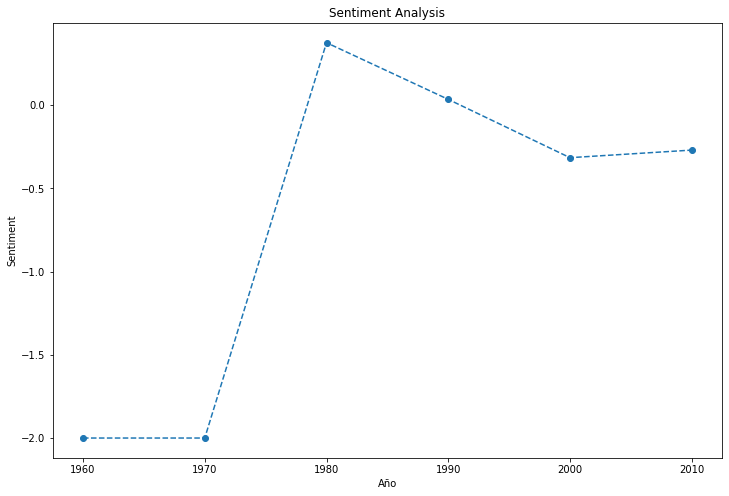

In [ ]:
# Senti Plot
senti_decades = [np.mean(senti_six), np.mean(senti_sev), np.mean(senti_eight), np.mean(senti_nine), np.mean(senti_two), np.mean(senti_twoten)]
decades = [1960, 1970, 1980, 1990, 2000, 2010]

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(decades, senti_decades,'--')
plt.scatter(decades, senti_decades)
plt.xlabel('Año')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis')
plt.show()